In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\loan.csv",low_memory=False)

In [3]:
data.shape

(39717, 111)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
data.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [7]:
pd.options.display.max_rows = 999

In [8]:
datacopy=data

In [9]:
missing_cols=datacopy.columns[datacopy.isnull().sum()/len(datacopy.index)*100>90]

In [10]:
len(missing_cols)

56

In [11]:
datacopy=datacopy.drop(missing_cols,axis=1)

In [12]:
datacopy.isnull().sum()/len(datacopy.index)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
datacopy[["desc","mths_since_last_delinq"]]

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...
39712,Our current gutter system on our home is old a...,0.0
39713,The rate of interest and fees incurred by carr...,5.0
39714,NaN,0.0
39715,NaN,0.0


In [14]:
datacopy=datacopy.drop(["desc","mths_since_last_delinq"],axis=1)

In [15]:
datacopy.shape

(39717, 53)

In [16]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [17]:
datacopy["int_rate"] = datacopy["int_rate"].str.replace("%","").astype(float)

In [18]:
emp_len_mv=datacopy[datacopy["emp_length"].isnull()].index

In [19]:
datacopy=datacopy.drop(emp_len_mv)

In [20]:
emp_len_mv

Int64Index([  168,   323,   394,   422,   439,   534,   555,   562,   569,
              678,
            ...
            32418, 32435, 32466, 32517, 32545, 32591, 32608, 32621, 32631,
            32665],
           dtype='int64', length=1075)

In [21]:
datacopy[~datacopy["emp_length"].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [22]:
import re

In [23]:
datacopy["emp_length"] = datacopy["emp_length"].apply(lambda x: re.findall("\d+",str(x))[0])

In [24]:
datacopy["emp_length"]=datacopy["emp_length"].astype(int)

In [25]:
datacopy['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [26]:
datacopy=datacopy[datacopy['loan_status']!="Current"]

In [27]:
datacopy['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

In [28]:
datacopy["issue_d"]

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 37544, dtype: object

In [29]:
from datetime import datetime

In [30]:
datacopy["issue_d"]=datacopy["issue_d"].apply(lambda x:datetime.strptime(x,"%b-%y"))

In [31]:
datacopy["issue_d"]

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 37544, dtype: datetime64[ns]

In [32]:
datacopy["isd_month"]=datacopy["issue_d"].apply(lambda x:x.month)

In [33]:
datacopy["isd_year"]=datacopy["issue_d"].apply(lambda x:x.year)
datacopy["isd_year"]

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: isd_year, Length: 37544, dtype: int64

In [34]:
datacopy["revol_util"]

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 37544, dtype: object

In [35]:
datacopy["revol_util"]=datacopy["revol_util"].str.replace("%","").astype(float)

In [36]:
datacopy["revol_util"]

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 37544, dtype: float64

In [37]:
datacopy["pymnt_plan"].unique() # not needed

array(['n'], dtype=object)

In [38]:
datacopy["earliest_cr_line"]   # not needed

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 37544, dtype: object

In [39]:
datacopy["initial_list_status"].unique()

array(['f'], dtype=object)

In [40]:
datacopy["out_prncp_inv"].unique()

array([0.])

In [41]:
datacopy["last_pymnt_d"]

0        Jan-15
1        Apr-13
2        Jun-14
3        Jan-15
5        Jan-15
          ...  
39712    Jul-10
39713    Jul-10
39714    Apr-08
39715    Jan-08
39716    Jun-10
Name: last_pymnt_d, Length: 37544, dtype: object

In [44]:
#datacopy["last_pymnt_d"]=datacopy["last_pymnt_d"].apply(lambda x:datetime.strptime(x,"%b-%y"))


In [ ]:
#datacopy["lpd_month"]=datacopy["last_pymnt_d"].apply(lambda x:x.month)
#datacopy["lpd_year"]=datacopy["last_pymnt_d"].apply(lambda x:x.year)

In [45]:
datacopy["collections_12_mths_ex_med"].unique()

array([ 0., nan])

In [46]:
datacopy["policy_code"].unique()

array([1], dtype=int64)

In [47]:
datacopy["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [48]:
datacopy["acc_now_delinq"].unique()

array([0], dtype=int64)

In [49]:
datacopy["delinq_amnt"].unique()

array([0], dtype=int64)

In [50]:
datacopy["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2., nan])

In [51]:
datacopy["tax_liens"].unique()

array([ 0., nan])

In [52]:
req_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
        'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
     'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens', 'isd_month', 'isd_year',"loan_status"]

In [53]:
datacopy[req_cols].to_csv("loan_processed.csv",index=False)

In [54]:
new_data=pd.read_csv("loan_processed.csv")

In [55]:
new_data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   47
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
chargeoff_within_12_mths     56
pub_rec_bankruptcies        697
tax_lien

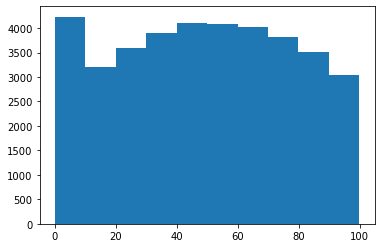

In [56]:
plt.hist(new_data["revol_util"])
plt.show()

In [57]:
median_ru=new_data["revol_util"].median()
new_data["revol_util"] = new_data["revol_util"].fillna(median_ru)

In [58]:
new_data["revol_util"].isnull().sum()

0

In [59]:
new_data["chargeoff_within_12_mths"].unique()    
    

array([ 0., nan])

In [60]:
new_data = new_data.drop("chargeoff_within_12_mths",axis=1)

In [61]:
new_data.isnull().sum()

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
purpose                      0
dti                          0
delinq_2yrs                  0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pymnt_amnt              0
pub_rec_bankruptcies       697
tax_liens                   39
isd_month                    0
isd_year

In [62]:
new_data["pub_rec_bankruptcies"].unique()

array([ 0.,  1.,  2., nan])

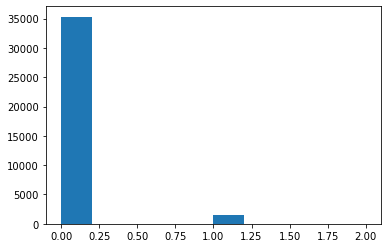

In [63]:
plt.hist(new_data["pub_rec_bankruptcies"])
plt.show()

In [64]:
new_data["pub_rec_bankruptcies"] = new_data["pub_rec_bankruptcies"].fillna(0)

In [65]:
new_data.isnull().sum()

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
purpose                     0
dti                         0
delinq_2yrs                 0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
pub_rec_bankruptcies        0
tax_liens                  39
isd_month                   0
isd_year                    0
loan_statu

In [66]:
new_data["tax_liens"].unique()

array([ 0., nan])

In [67]:
new_data=new_data.drop("tax_liens",axis=1)

In [68]:
new_data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
purpose                    0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankruptcies       0
isd_month                  0
isd_year                   0
loan_status                0
dtype: int64

In [69]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37544 entries, 0 to 37543
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                37544 non-null  int64  
 1   funded_amnt              37544 non-null  int64  
 2   funded_amnt_inv          37544 non-null  float64
 3   term                     37544 non-null  object 
 4   int_rate                 37544 non-null  float64
 5   installment              37544 non-null  float64
 6   grade                    37544 non-null  object 
 7   sub_grade                37544 non-null  object 
 8   emp_length               37544 non-null  int64  
 9   home_ownership           37544 non-null  object 
 10  annual_inc               37544 non-null  float64
 11  verification_status      37544 non-null  object 
 12  purpose                  37544 non-null  object 
 13  dti                      37544 non-null  float64
 14  delinq_2yrs           

In [70]:
new_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [71]:
new_data["term"]= new_data["term"].map({' 36 months':36,' 60 months':60})

In [72]:
new_data["term"]

0        36
1        60
2        36
3        36
4        36
         ..
37539    36
37540    36
37541    36
37542    36
37543    36
Name: term, Length: 37544, dtype: int64

In [73]:
new_data["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [74]:
new_data["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [75]:
new_data["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [76]:
new_data["verification_status"].unique() 

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [77]:
new_data["purpose"].unique() 

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [78]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_data["grade"]=le.fit_transform(new_data["grade"])

In [79]:
new_data.shape

(37544, 33)

In [80]:
new_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'loan_status'],
      dtype='object')

In [81]:
x=new_data.drop('loan_status',axis=1)
y=new_data['loan_status']

In [82]:
x=pd.get_dummies(x)

In [83]:
#DecisionTress/BaggingClassifier/RandomForest

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=134)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report



In [86]:
x_train.dtypes

loan_amnt                                int64
funded_amnt                              int64
funded_amnt_inv                        float64
term                                     int64
int_rate                               float64
installment                            float64
grade                                    int32
emp_length                               int64
annual_inc                             float64
dti                                    float64
delinq_2yrs                              int64
inq_last_6mths                           int64
open_acc                                 int64
pub_rec                                  int64
revol_bal                                int64
revol_util                             float64
total_acc                                int64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int                          float64
total_rec_lat

In [87]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9925422825942203

In [88]:
confusion_matrix(y_test,y_pred)

array([[1092,   31],
       [  25, 6361]], dtype=int64)

In [89]:
base= DecisionTreeClassifier()

from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=base,n_estimators=50)
bg.fit(x_train,y_train)
y_pred=bg.predict(x_test)
accuracy_score(y_test,y_pred)

0.9953389266213877

In [90]:
confusion_matrix(y_test,y_pred)

array([[1088,   35],
       [   0, 6386]], dtype=int64)

In [91]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier(max_depth=16,n_estimators=150)
rt.fit(x_train,y_train)
y_pred=rt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9940071913703555

In [92]:
confusion_matrix(y_test,y_pred)

array([[1078,   45],
       [   0, 6386]], dtype=int64)

In [94]:
#Assignment Question 
#Check the cross validated score on decision trees, bagging classifier, random forest. 
#Do the scaling and apply logisitc regression , KNN, svm

In [93]:
###K fold cross validation technique

1.Decision Tree

In [95]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeClassifier()

cv_resultsDT=cross_val_score(dt,x_train,y_train,cv=10,scoring="accuracy")
cv_meanDT=cv_resultsDT.mean()
print("Accuracy of Decision Tree with CV is ",cv_meanDT)

Accuracy of Decision Tree with CV is  0.9933744351520651


2.Bagging Classifier

In [97]:
bs_et= DecisionTreeClassifier()

bg=BaggingClassifier(base_estimator=bs_et,n_estimators=100)

cv_resultsbg=cross_val_score(bg,x_train,y_train,cv=10,scoring="accuracy")
cv_meanbg=cv_resultsbg.mean()
print("Accuracy of Bagging CLassifier with CV is ",cv_meanbg)

Accuracy of Bagging CLassifier with CV is  0.9956384605186204


3.Random Forest

In [98]:
rt=RandomForestClassifier()

cv_resultsrf=cross_val_score(rt,x_train,y_train,cv=10,scoring="accuracy")
cv_meanrf=cv_resultsrf.mean()
print("Accuracy of Random Forest with CV is ",cv_meanrf)

Accuracy of Random Forest with CV is  0.9944064923092887


In [99]:
results =pd.DataFrame([cv_meanDT,cv_meanbg,cv_meanrf],columns=['Accuracy values'])
results = results.set_axis(["Decision Tree with CV","Bagging classifer with CV","Random Forest with CV"])
results

,Accuracy values
Decision Tree with CV,0.993374
Bagging classifer with CV,0.995638
Random Forest with CV,0.994406


In [100]:
#WE will do scaling and apply logisitc regression , KNN, svm

In [101]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,30035.0,11102.608623,7366.508672,500.00,5400.000000,9800.000000,15000.000000,3.500000e+04
funded_amnt,30035.0,10835.749126,7108.952296,500.00,5300.000000,9600.000000,15000.000000,3.500000e+04
funded_amnt_inv,30035.0,10261.491944,7038.374975,0.00,5000.000000,8800.000000,14025.000000,3.500000e+04
term,30035.0,41.909905,10.339937,36.00,36.000000,36.000000,36.000000,6.000000e+01
int_rate,30035.0,11.950506,3.684473,5.42,8.940000,11.780000,14.420000,2.440000e+01
installment,30035.0,324.169390,209.624349,15.69,166.630000,279.090000,428.665000,1.305190e+03
grade,30035.0,1.558715,1.382320,0.00,0.000000,1.000000,2.000000,6.000000e+00
emp_length,30035.0,5.064192,3.404058,1.00,2.000000,4.000000,9.000000,1.000000e+01
annual_inc,30035.0,69139.851938,66341.869316,4000.00,41000.000000,59500.000000,82500.000000,6.000000e+06
dti,30035.0,13.288159,6.663032,0.00,8.170000,13.370000,18.560000,2.999000e+01


In [102]:
x_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'isd_month', 'isd_year', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',

In [103]:
num_cols=['loan_amnt', 'funded_amnt', 'funded_amnt_inv','annual_inc','revol_bal','total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt']

In [104]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train.loc[:,num_cols]=sc.fit_transform(x_train[num_cols])
x_test.loc[:,num_cols]=sc.fit_transform(x_test[num_cols])

1.Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc_lr=accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression without CV is ",acc_lr)

Accuracy of Logistic Regression without CV is  0.9557863896657345


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [107]:
lr=LogisticRegression()


cv_resultslr=cross_val_score(lr,x_train,y_train,cv=10,scoring="accuracy")
cv_meanlr=cv_resultslr.mean()
print("Accuracy of Logistic Regression with CV is ",cv_meanlr)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy of Logistic Regression with CV is  0.9336779066472809


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2.SVM

In [110]:
from sklearn.svm import SVC
SV=SVC()
SV.fit(x_train,y_train)
y_pred=SV.predict(x_test)
acc_svm=accuracy_score(y_test,y_pred)
print("Accuracy of SVM without CV is ",acc_svm)

Accuracy of SVM without CV is  0.8504461313090957


In [111]:
SV=SVC()
cv_results_svm=cross_val_score(SV,x_train,y_train,cv=10,scoring="accuracy")
cv_meansvm=cv_results_svm.mean()
print("Accuracy of SVM with CV is ",cv_meansvm)

Accuracy of SVM with CV is  0.8576327800029532


3.KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc_knn=accuracy_score(y_test,y_pred)
print("Accuracy of KNN without CV is ",acc_knn)

Accuracy of KNN without CV is  0.8508456518844054


In [113]:
knn=KNeighborsClassifier(n_neighbors=15)
cv_resultsknn=cross_val_score(knn,x_train,y_train,cv=10,scoring="accuracy")
cv_meanknn=cv_resultsknn.mean()
print("Accuracy of KNN with CV is ",cv_meanknn)

Accuracy of KNN with CV is  0.8582321806023538


In [115]:
results =pd.DataFrame([acc_lr, cv_meanlr,acc_svm,cv_meansvm,acc_knn,cv_meanknn],columns=['Accuracy values'])
results = results.set_axis(["Logistic Regression w/o CV ", "Logistic Regression with CV","SVM w/o CV","SVM with CV","KNN w/o CV","KNN with CV"])
results

,Accuracy values
Logistic Regression w/o CV,0.955786
Logistic Regression with CV,0.933678
SVM w/o CV,0.850446
SVM with CV,0.857633
KNN w/o CV,0.850846
KNN with CV,0.858232
